# Proje Özeti: Kredi Uygunluğunu Tahmin Etme

**Dream Housing Finance**, müşterilerine ev kredisi hizmeti sunmaktadır ve müşteri kredi uygunluk sürecini otomatikleştirmek istemektedir. Bu proje, müşterilerden alınan çeşitli bilgiler kullanılarak kredi onaylanma durumunu tahmin etmek amacıyla bir model geliştirmeyi hedeflemektedir.

---

## Veri Setleri

### Eğitim Verisi (train.csv)
- Müşterilerin kredi uygunluk durumunu içerir.
- **Hedef Değişken:** Kredi Durumu (Evet/Hayır).

### Test Verisi (test.csv)
- Yeni müşterilere ait bilgileri içerir.
- **Hedef Değişken:** Kredi Durumu (Evet/Hayır) bu veri seti üzerinde tahmin edilecektir.

### Gönderim Dosyası (submission.csv)
- Test verisi için tahmin edilen kredi durumunu içerir.
- **Kolonlar:**
  - `Kredi_ID`
  - `Kredi_Durumu`

---

## Veri Sözlüğü

| **Değişken**         | **Açıklama**                                      |
|----------------------|---------------------------------------------------|
| **Cinsiyet**          | Erkek/Kadın.                                      |
| **Evli**              | Evli olup olmama durumu.                         |
| **Bağımlılar**        | Bakmakla yükümlü kişi sayısı.                     |
| **Eğitim**            | Lisansüstü veya Lisans eğitimi.                  |
| **Self_Employed**     | Serbest meslek sahibi olup olmama durumu.        |
| **Başvuru Geliri**    | Başvuru sahibinin geliri.                        |
| **Eş Geliri**         | Ortak başvuranın geliri.                         |
| **Kredi Miktarı**     | Talep edilen kredi miktarı.                      |
| **Kredi Süresi**      | Kredi geri ödeme süresi (ay olarak).             |
| **Kredi Geçmişi**     | Geçmiş kredi ödemelerinin durumu.                |
| **Mülk Alanı**        | Kentsel, Yarı Kentsel veya Kırsal.               |
| **Kredi Durumu**      | Kredi onaylandı mı? (Evet/Hayır).                |


In [147]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [148]:
train = pd.read_csv(r"C:\Users\Samira\Sumeyra\btk-akademi\Home-Loan-Eligibility-Predictor\dataset\train_ctrUa4K.csv")
test = pd.read_csv(r"C:\Users\Samira\Sumeyra\btk-akademi\Home-Loan-Eligibility-Predictor\dataset\test_lAUu6dG.csv")

In [149]:
train_original = train.copy()
test_original = test.copy()

In [150]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [151]:
train.shape

(614, 13)

In [152]:
test.shape

(367, 12)

<h1 style="font-family: Arial, sans-serif; margin-bottom: 10px;">📊 Univariate Analysis (Tek Değişkenli Analiz)</h1>
<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
Bu bölümde, verileri tek bir değişken (<strong><code>variable</code></strong>) üzerinden analiz edeceğiz. Tek değişkenli analiz, her bir değişkeni bağımsız olarak inceleyen en temel analiz türüdür. <strong>Kategorik veriler</strong> (<code>categorical data</code>) için, her bir kategoriye ait <strong>frekansları</strong> (<code>frequencies</code>) gösteren frekans tabloları (<code>frequency tables</code>) veya çubuk grafikler (<code>bar plots</code>) kullanılabilir. Sayısal veriler (<code>numerical data</code>) için ise, değişkenin <strong>dağılımını</strong> (<code>distribution</code>) görselleştirmek amacıyla olasılık yoğunluk grafikleri (<code>probability density plots</code>) tercih edilebilir.
</font>

<h2 style="font-family: Arial, sans-serif; margin-bottom: 10px;">🎯 Target Variable (Hedef Değişken)</h2>
<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
Hedef değişken olarak <strong><code>loan_status</code></strong>'a bakacağız. Bu değişken <strong>kategorik</strong> (<code>categorical</code>) bir değişken olduğu için, öncelikle <strong>frekans tablosunu</strong> (<code>frequency table</code>), <strong>yüzde dağılımını</strong> (<code>percentage distribution</code>) ve <strong>çubuk grafiğini</strong> (<code>bar plot</code>) inceleyeceğiz. Bir değişkenin frekans tablosu, o değişkenin her bir kategorisinin sayısını gösterir. Aşağıda <strong>Loan_Status</strong> değişkeninin frekans tablosu yer almaktadır:
</font>

In [153]:
train["Loan_Status"].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
Bu tablo, <strong>Y</strong> kategorisinin 422 kez, <strong>N</strong> kategorisinin ise 192 kez görüldüğünü göstermektedir.
</font>

In [154]:
# "Loan_Status" sütunundaki her bir değerin oranını (yüzdesini) hesaplar.
train["Loan_Status"].value_counts(normalize= True)

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

<Axes: xlabel='Loan_Status'>

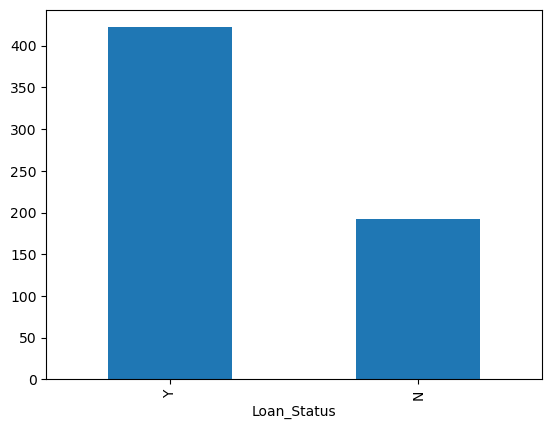

In [155]:
# "Loan_Status" sütunundaki her bir değerin sayısını hesaplayıp, bar grafiği olarak görselleştirir.
train["Loan_Status"].value_counts().plot.bar()

<h2 style="font-family: Arial, sans-serif; margin-bottom: 10px;">🔍 Her Bir Değişkeni Ayrı Ayrı Görselleştirelim</h2>
<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
Bir veri kümesindeki değişkenler üç ana türe ayrılabilir: <strong>Kategorik</strong>, <strong>Sıralı (Ordinal)</strong> ve <strong>Sayısal (Numerical)</strong>.
</font>

<ul style="font-size: 16px; font-family: Arial, sans-serif; line-height: 1.6; padding-left: 20px; margin-bottom: 15px;">
  <li><strong>Kategorik Özellikler:</strong> Bu özellikler, sıralama içermeyen kategoriler veya grupları ifade eder. Örnek olarak <strong>cinsiyet</strong>, <strong>medeni durum</strong>, <strong>özgür çalışanlık durumu</strong>, <strong>kredi geçmişi</strong> ve <strong>kredi durumu</strong> gibi değişkenler verilebilir.</li>
  <li><strong>Sıralı Özellikler:</strong> Bu değişkenler, kategorik olmanın yanı sıra belirli bir sıralama veya derecelendirme içerir. <strong>Bağımlı sayısı</strong> (<code>dependents</code>), <strong>eğitim durumu</strong> (<code>education</code>) ve <strong>mülk alanı</strong> (<code>property area</code>) gibi değişkenler sıralı özelliklerdir, çünkü bu tür değişkenlerde bir sıralama düzeni bulunur.</li>
  <li><strong>Sayısal Özellikler:</strong> Bu özellikler, sayısal değerlerden oluşur ve sürekli ya da kesikli olabilir. <strong>Başvuru sahibinin geliri</strong> (<code>ApplicantIncome</code>), <strong>eş başvuru sahibinin geliri</strong> (<code>CoapplicantIncome</code>) ve <strong>kredi miktarı</strong> (<code>LoanAmount</code>) gibi değişkenler sayısal özelliklerdir. Bu tür değişkenler, sayısal bir ölçek üzerinde ölçülür ve matematiksel işlemler yapılabilir.</li>
</ul>


<h2 style="font-family: Arial, sans-serif; margin-bottom: 10px;">🔑 Independent Variable (Categorical)</h2>

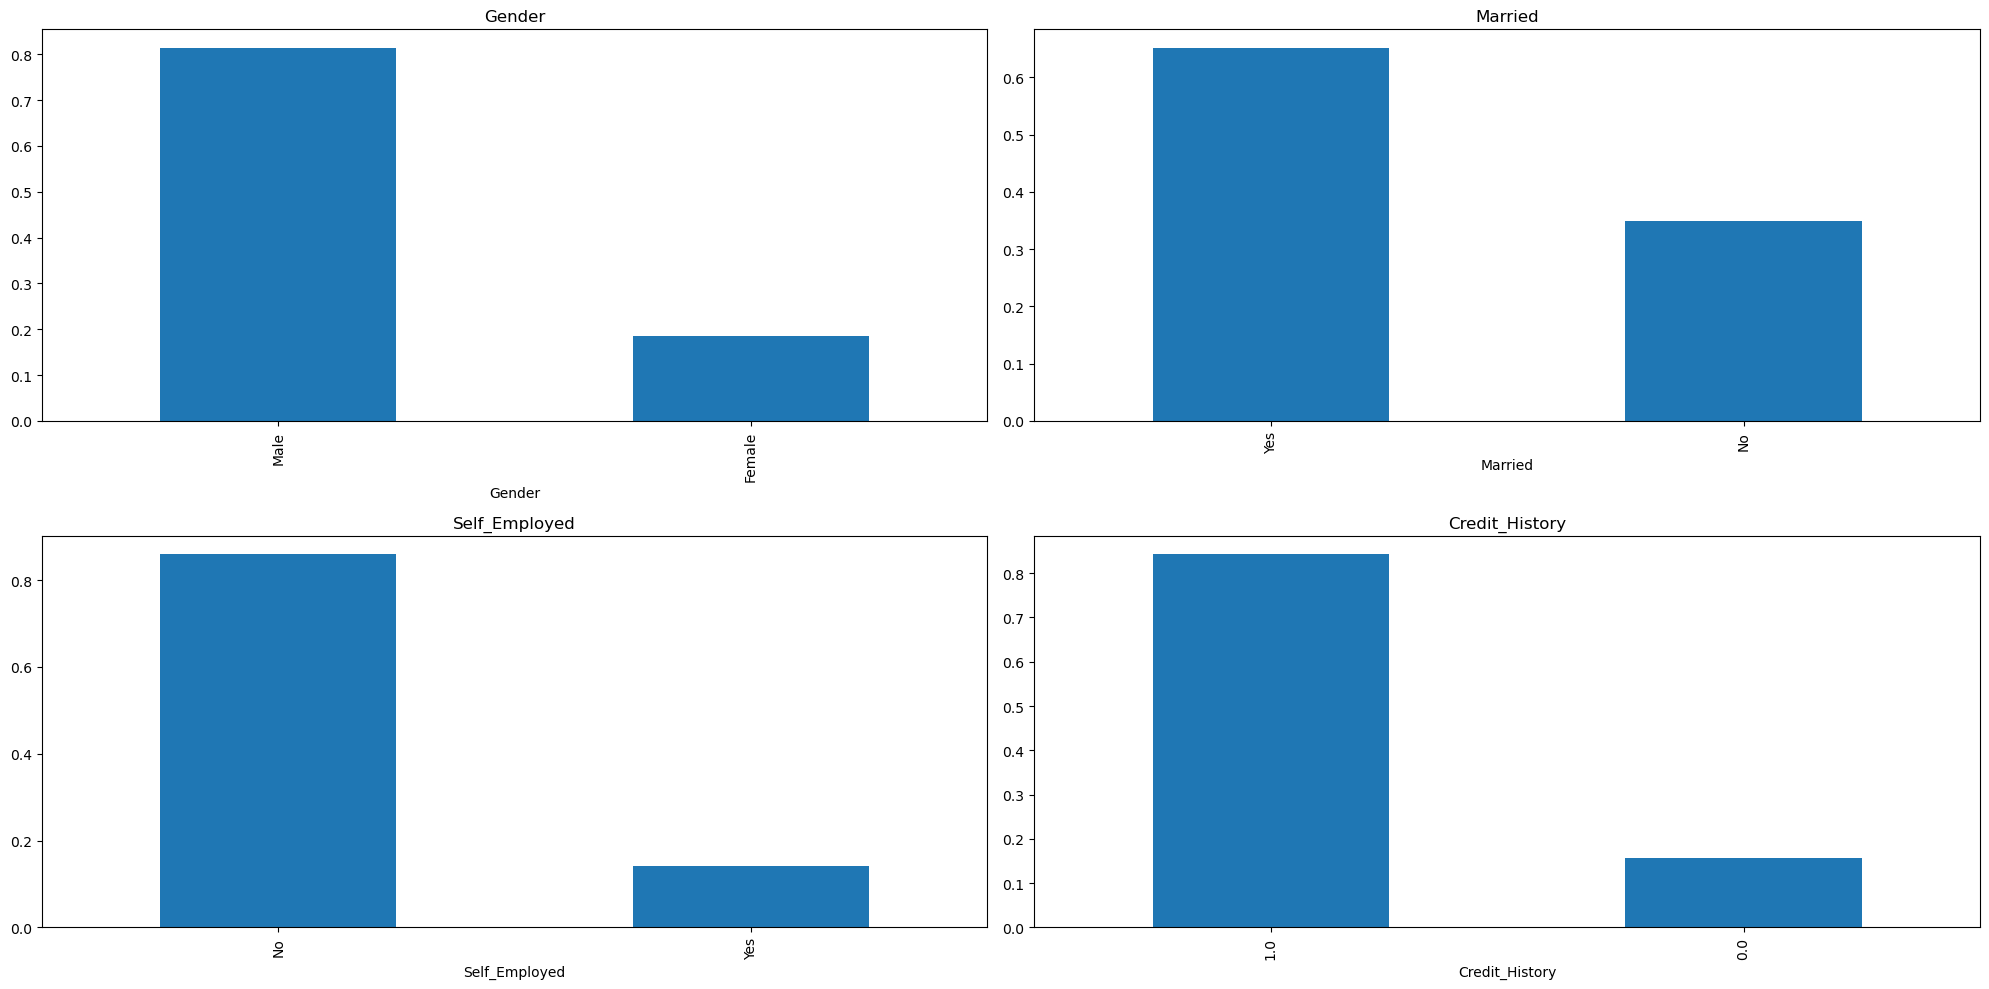

In [156]:
# 2x2 grid şeklinde 4 alt grafik oluşturuyoruz
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

# Gender grafiği
train["Gender"].value_counts(normalize=True).plot.bar(ax=axes[0, 0], title="Gender")

# Married grafiği
train["Married"].value_counts(normalize=True).plot.bar(ax=axes[0, 1], title="Married")

# Self_Employed grafiği
train["Self_Employed"].value_counts(normalize=True).plot.bar(ax=axes[1, 0], title="Self_Employed")

# Credit_History grafiği
train["Credit_History"].value_counts(normalize=True).plot.bar(ax=axes[1, 1], title="Credit_History")

# Grafiklerin düzenini iyileştirmek için
plt.tight_layout()

# Grafikleri göster
plt.show()

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
Yukarıdaki çubuk grafiklerden şu sonuçlar çıkarılabilir:
</font>

<ul style="font-size: 16px; font-family: Arial, sans-serif; line-height: 1.6; padding-left: 20px; margin-bottom: 15px;">
  <li>Verideki başvuru sahiplerinin <strong>%80</strong>'i erkektir.</li>
  <li>Verideki başvuru sahiplerinin yaklaşık <strong>%65</strong>'i evlidir.</li>
  <li>Verideki başvuru sahiplerinin yaklaşık <strong>%15</strong>'i serbest meslek sahibidir.</li>
  <li>Başvuru sahiplerinin yaklaşık <strong>%85</strong>'i borçlarını ödemiştir.</li>
</ul>

<h2 style="font-family: Arial, sans-serif; margin-bottom: 10px;">📚 Independent Variable (Ordinal)</h2>

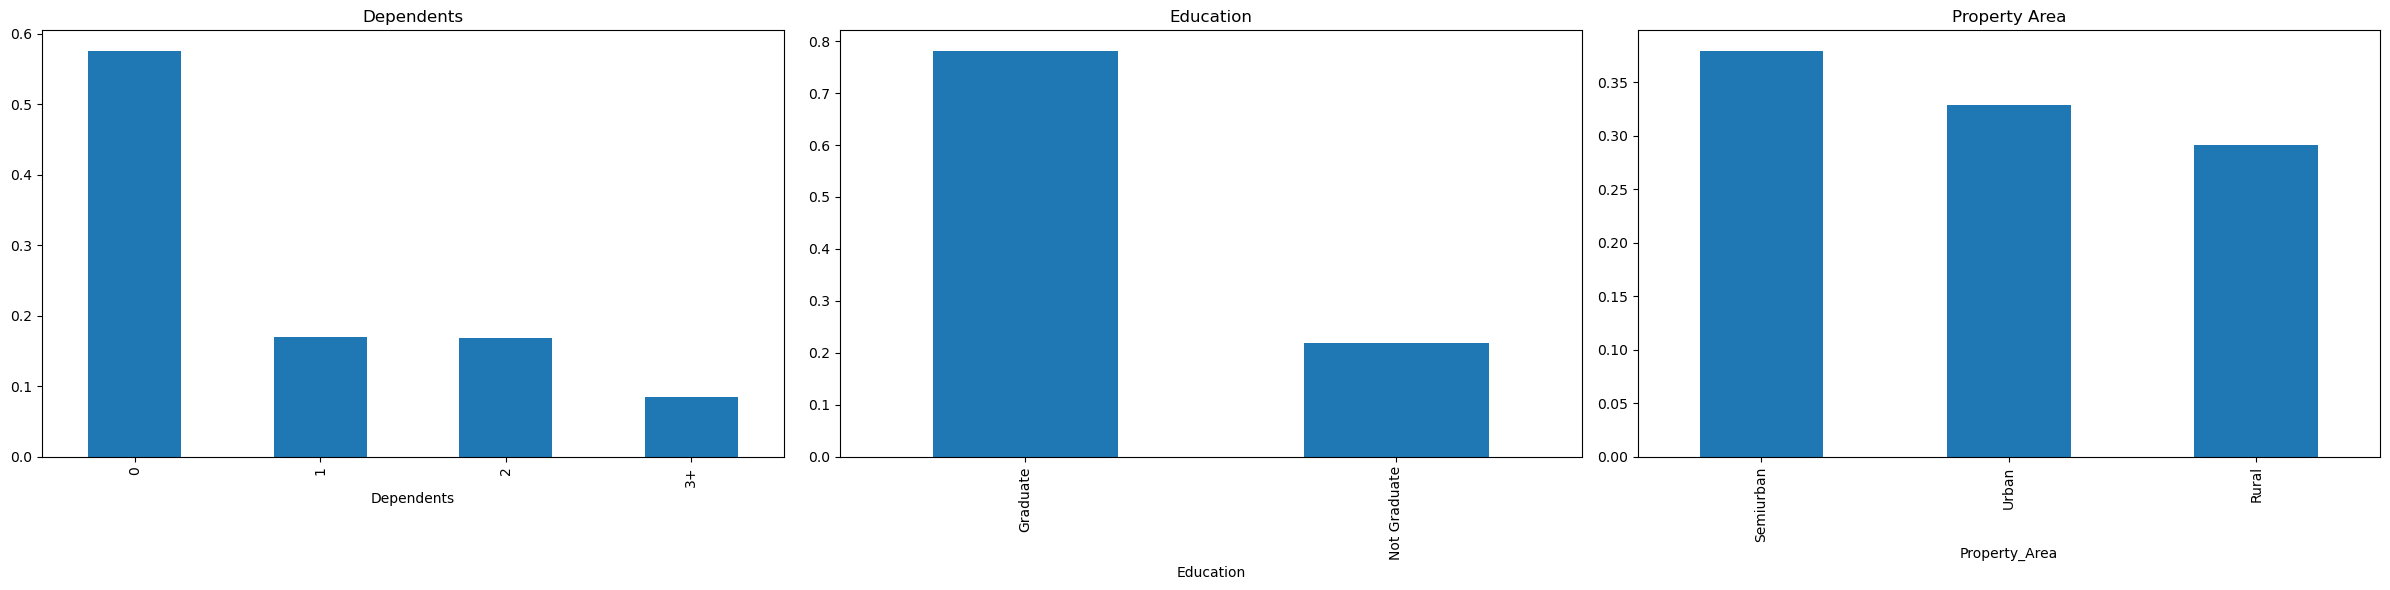

In [157]:
# Alt grafiklerin yerleşimini ve genel figürü tanımlayın
fig, axes = plt.subplots(1, 3, figsize=(24, 6))  # 1 satır, 3 sütun

# İlk alt grafik: Dependents
train["Dependents"].value_counts(normalize=True).plot.bar(ax=axes[0], title="Dependents")

# İkinci alt grafik: Education
train["Education"].value_counts(normalize=True).plot.bar(ax=axes[1], title="Education")

# Üçüncü alt grafik: Property Area
train["Property_Area"].value_counts(normalize=True).plot.bar(ax=axes[2], title="Property Area")

# Alt grafikler arasındaki düzeni ayarla ve göster
plt.tight_layout()
plt.show()

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
Yukarıdaki çubuk grafiklerden şu sonuçlar çıkarılabilir:
</font>

<ul style="font-size: 16px; font-family: Arial, sans-serif; line-height: 1.6; padding-left: 20px; margin-bottom: 15px;">
  <li>Başvuru sahiplerinin çoğu bakmakla yükümlü kişiye (<strong>Dependents</strong>) sahip değildir.</li>
  <li>Başvuru sahiplerinin yaklaşık <strong>%80</strong>'i mezundur (<strong>Graduate</strong>).</li>
  <li>Başvuru sahiplerinin çoğu yarı kentsel (<strong>semiurban</strong>) bölgelerden gelmektedir.</li>
</ul>

<h2 style="font-family: Arial, sans-serif; margin-bottom: 10px;">💸 Bağımsız Değişken (Sayısal)</h2>
<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
Şimdiye kadar kategorik ve sıralı değişkenleri inceledik. Şimdi ise sayısal değişkenleri görselleştirelim. İlk olarak, <strong>Applicant Income</strong> (<strong>Başvuru Sahibinin Geliri</strong>) dağılımına bakalım.
</font>

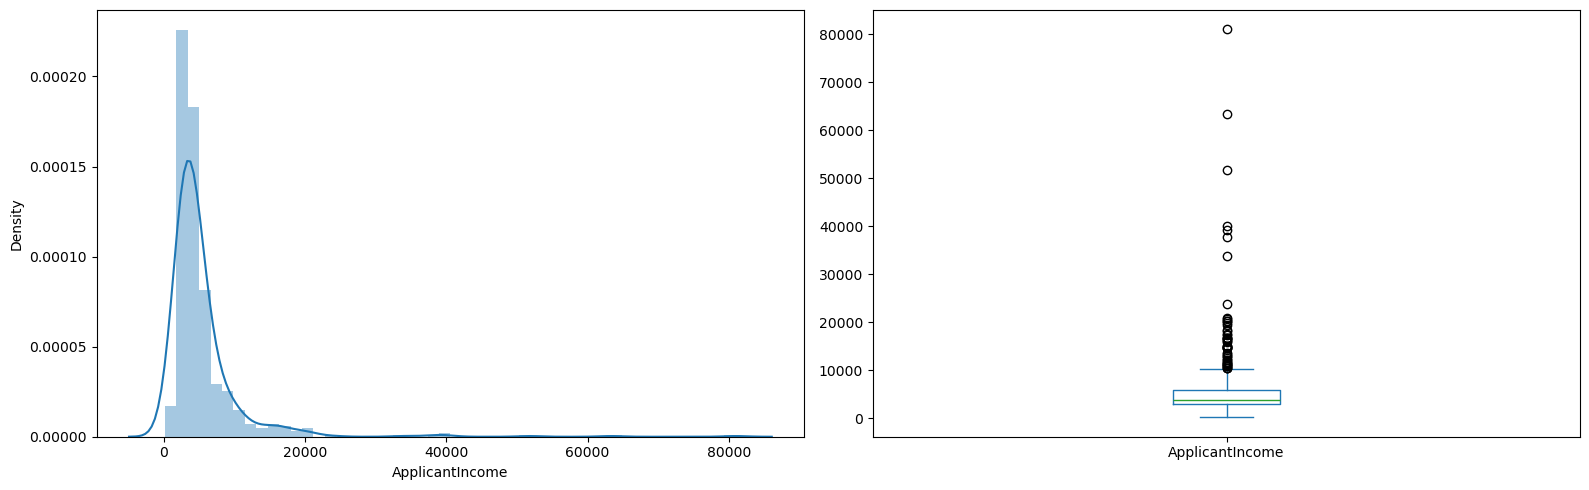

In [158]:
# 1 satır ve 2 sütundan oluşan 2 alt grafik düzeni oluşturuluyor
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Sol tarafta sadece histogram (KDE olmadan)
sns.distplot(train["ApplicantIncome"], ax=axes[0])

# Sağ tarafta kutu grafiği
train["ApplicantIncome"].plot.box(ax=axes[1])

# Grafiklerin düzenini iyileştirmek için
plt.tight_layout()

# Grafikleri göster
plt.show()


<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
Başvuru Sahibinin Geliri (<strong>ApplicantIncome</strong>) dağılımı sola kaymış, yani veri normal dağılmıyor. Veriyi normalleştirmeyi ilerleyen bölümlerde deneyeceğiz, çünkü algoritmalar normal dağılım gösteren verilerle daha iyi çalışır.
</font>

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
Boxplot (kutu grafiği), birçok aykırı değer olduğunu gösteriyor. Bu, toplumdaki gelir eşitsizliğinden kaynaklanabilir ve farklı eğitim seviyelerindeki bireyleri incelediğimiz için bu durum daha belirgin olabilir. Şimdi veriyi <strong>Eğitim (Education)</strong> seviyelerine göre ayıralım:
</font>

Text(0.5, 0.98, '')

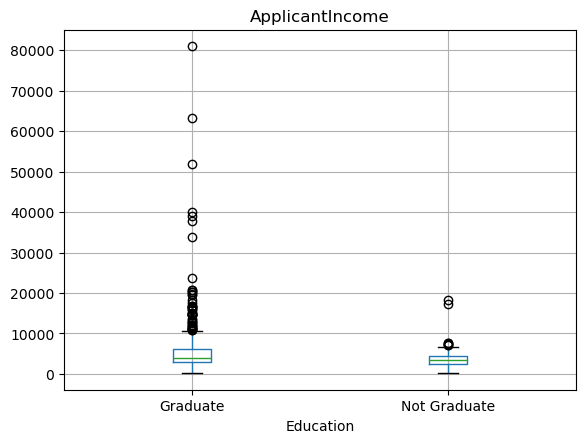

In [159]:
train.boxplot(column = "ApplicantIncome", by = "Education")
plt.suptitle("")

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
Çok yüksek gelire sahip mezun sayısının arttığını ve bunların aykırı değerler oluşturduğunu görüyoruz. Şimdi, "<strong>CoapplicantIncome</strong>" (ortak başvuru sahibinin geliri) dağılımını inceleyelim:
</font>

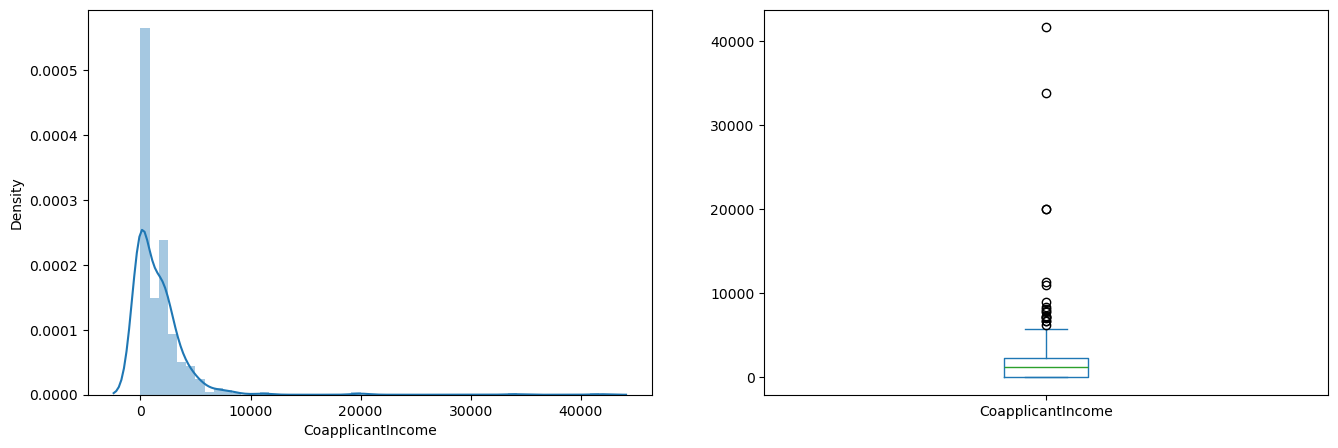

In [160]:
plt.figure(1), plt.subplot(121), sns.distplot(train["CoapplicantIncome"]);
plt.subplot(122), train["CoapplicantIncome"].plot.box(figsize=(16,5))
plt.show()

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
Başvuru sahibinin geliriyle benzer bir dağılım görüyoruz. Ortak başvuru sahiplerinin çoğunluğu 0 ile 500 arasında gelir elde ediyor. Ayrıca, ortak başvuru sahibinin gelirinde birçok aykırı değer bulunuyor ve dağılım normal değil. Şimdi, <strong>LoanAmount</strong> (kredi miktarı) değişkeninin dağılımına bakalım:
</font>


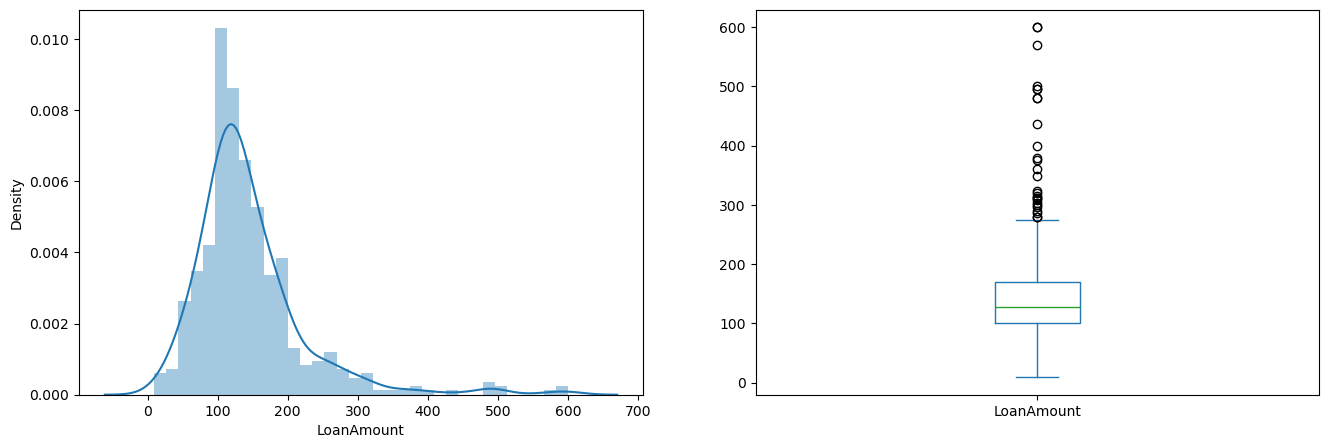

In [161]:
df = train.dropna()
plt.figure(1), plt.subplot(121),
sns.distplot(df["LoanAmount"]);
plt.subplot(122), df["LoanAmount"].plot.box(figsize=(16,5))
plt.show()

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
Bu değişkende birçok aykırı değer bulunduğunu görüyoruz ve dağılım genel olarak normal.
</font>

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
  <h2 style="font-family: Arial, sans-serif; margin-bottom: 10px;">Hipotezler</h2>
  Öncelikle, daha önce oluşturduğumuz bazı hipotezleri hatırlayalım:
  
  <ul>
    <li><strong>Higher income (Yüksek gelir)</strong> sahip başvuru sahiplerinin <strong>loan approval (kredi onayı)</strong> alma olasılıklarının daha yüksek olması beklenir.</li>
    <li>Önceki borçlarını düzgün bir şekilde ödeyen başvuru sahiplerinin <strong>loan approval (kredi onayı)</strong> alma olasılıkları daha yüksek olmalıdır.</li>
    <li><strong>Lower loan amount (Daha düşük kredi miktarı)</strong> talep eden başvuru sahiplerinin <strong>loan approval (kredi onayı)</strong> alma olasılığı daha yüksek olmalıdır.</li>
    <li><strong>Lower monthly repayment amount (Daha düşük aylık ödeme tutarı)</strong> gereksinimi olan başvuru sahiplerinin <strong>loan approval (kredi onayı)</strong> alma şansı daha yüksek olmalıdır.</li>
  </ul>
  
  Bu hipotezleri <strong>bivariate analysis (ikili analiz)</strong> ile test etmeyi amaçlıyoruz. İlk aşamada, her bir değişkeni <strong>univariate analysis (tek değişkenli analiz)</strong> ile tek tek inceledik. Şimdi ise, bu değişkenlerin <strong>loan approval (kredi onayı)</strong> ile ilişkilerini daha derinlemesine inceleyeceğiz.
</font>

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
  <h2 style="font-family: Arial, sans-serif; margin-bottom: 10px;">Kategorik Bağımsız Değişken ve Hedef Değişken Arasındaki İlişki 📊</h2>
  <p>
    İlk olarak, hedef değişken ile olan ilişkiyi inceleyelim. <strong>Yığılmış çubuk grafik (stacked bar plot) 📈</strong> ile, onaylanan ve onaylanmayan kredilerin oranlarını görebiliriz. Bu grafik, kategorik bağımsız değişkenin hedef değişkenle nasıl bir ilişki kurduğunu görselleştirmemize olanak tanır. Böylece, her bir kategorinin kredi onayı alma durumu ile ilişkisini net bir şekilde gözlemleyebiliriz.
  </p>
</font>


<Axes: xlabel='Gender'>

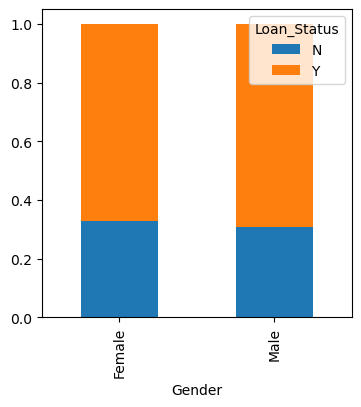

In [162]:
Gender = pd.crosstab(train["Gender"], train["Loan_Status"])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked= True, figsize= (4,4))

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
  Bu grafik, erkek ve kadın başvuru sahiplerinin, onaylanan ve onaylanmayan krediler için oranlarının birbirine oldukça yakın olduğunu gösteriyor. 👨‍💼👩‍💼 Yani, erkek ve kadın başvuru sahiplerinin kredi onayı alma oranları benzer. <br>
Şimdi, kalan kategorik değişkenleri hedef değişken ile görselleştirelim:
</font>


<Axes: xlabel='Self_Employed'>

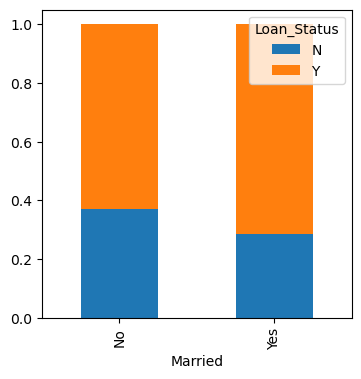

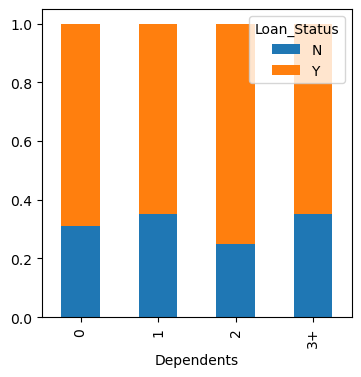

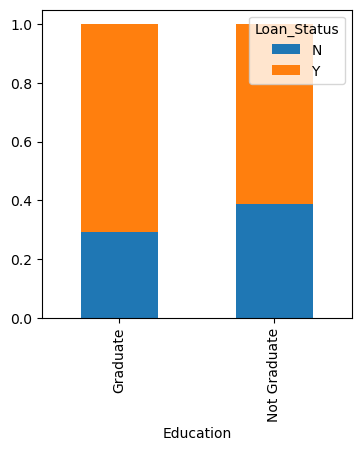

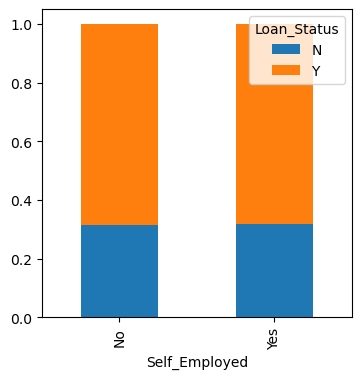

In [163]:
Married = pd.crosstab(train["Married"], train["Loan_Status"])
Dependents = pd.crosstab(train["Dependents"], train["Loan_Status"])
Education = pd.crosstab(train["Education"], train["Loan_Status"])
Self_Employed = pd.crosstab(train["Self_Employed"], train["Loan_Status"])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
  <strong>Yorumlar:</strong>
  <ul>
    <li><strong>Married (Evli)</strong> başvuru sahiplerinin oranı, onaylanan kredilerde daha yüksektir. 💍✔️</li>
    <li><strong>Dependents (Bağımlılar)</strong> sayısı 1 veya 3+ olan başvuru sahiplerinin kredi onayı kategorilerine göre dağılımı benzer görünmektedir. 👨‍👩‍👧‍👦🔄</li>
    <li><strong>Self_Employed (Kendi işini yapan)</strong> başvuru sahipleri ile <strong>Loan_Status (Kredi Onayı)</strong> arasındaki grafik, anlamlı bir fark göstermemektedir, bu yüzden buradan önemli bir çıkarım yapamıyoruz. 👔🚫</li>
  </ul><br>
Şimdi, kalan kategorik bağımsız değişkenlerle Loan_Status (Kredi Onayı) arasındaki ilişkiye bakalım:
</font>

<Axes: xlabel='Property_Area'>

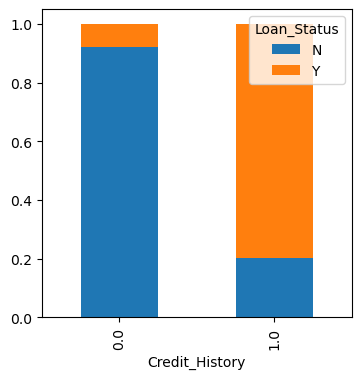

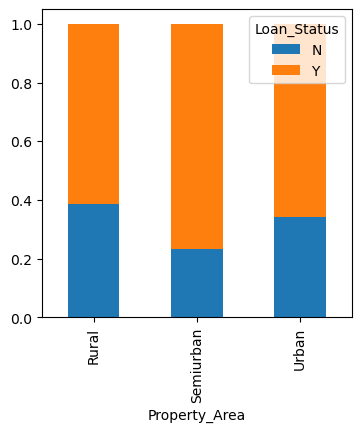

In [164]:
Credit_History = pd.crosstab(train["Credit_History"], train["Loan_Status"])
Property_Area = pd.crosstab(train["Property_Area"], train["Loan_Status"])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
  <strong>Yorumlar:</strong>
  <ul>
    <li><strong>Credit_History (Kredi Geçmişi)</strong> değeri 1 olan kişilerin, kredi onayı alma olasılıkları daha yüksektir. Bu, geçmişte kredi ödemelerinde başarı göstermiş kişilerin onay alma şanslarının daha yüksek olduğunu gösteriyor. 📈✔️</li>
    <li><strong>Property_Area (Mülk Alanı)</strong> kategorisinde, <strong>semiurban (yarı kentsel)</strong> bölgelerde kredi onayı alma oranı, <strong>rural (kırsal)</strong> ve <strong>urban (kentsel)</strong> alanlara kıyasla daha yüksektir. 🌆🏘️</li>
  </ul><br>
Şimdi, numerical independent variables (sayısal bağımsız değişkenler) ile target variable (hedef değişken) arasındaki ilişkiyi görselleştirelim.
</font>

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
  <h2 style="font-family: Arial, sans-serif; margin-bottom: 10px;">Sayısal Bağımsız Değişken ve Hedef Değişken Arasındaki İlişki</h2>
  İlk olarak, kredi onayı alınan ve alınmayan başvuru sahiplerinin ortalama gelirlerini karşılaştıralım. Bunun için aşağıdaki kodu kullanıyoruz:
</font>

<Axes: xlabel='Loan_Status'>

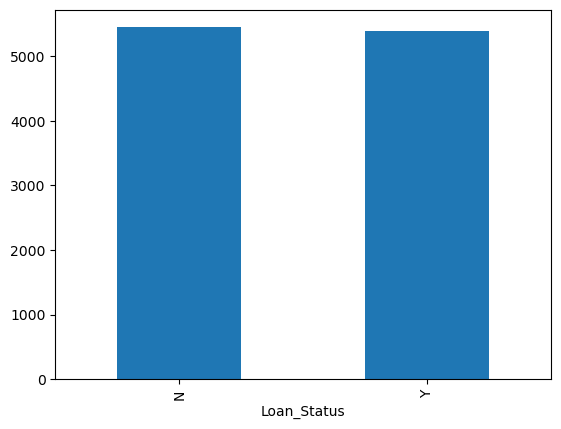

In [165]:
train.groupby("Loan_Status")["ApplicantIncome"].mean().plot.bar()

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
  Bu grafikte, y ekseni başvuru sahiplerinin ortalama gelirini temsil eder. Ancak, burada ortalama gelirde herhangi bir belirgin değişiklik gözlemlenmiyor. Bu nedenle, daha ayrıntılı bir analiz yapmak amacıyla, başvuru sahibi gelirlerini belirli aralıklara (binlere) ayıralım ve her gelir aralığındaki kredi onayı durumunu inceleyelim.
</font>

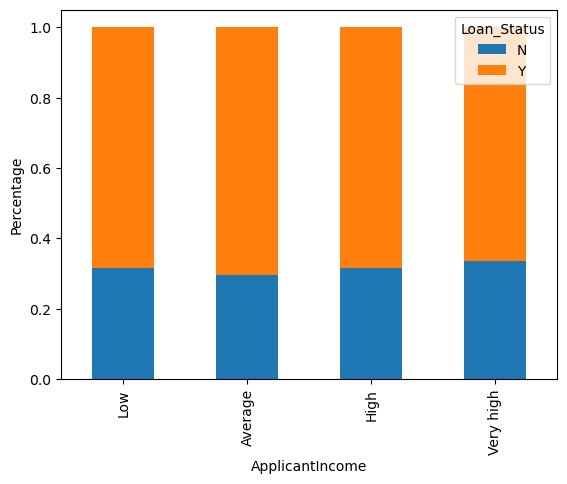

In [166]:
# Gelir binleri ve etiketleri belirleniyor
bins = [0, 2500, 4000, 6000, 81000]
group = ["Low", "Average", "High", "Very high"]
train["Income_bin"] = pd.cut(train["ApplicantIncome"], bins, labels=group)

Income_bin = pd.crosstab(train["Income_bin"], train["Loan_Status"])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel("ApplicantIncome")
P =plt.ylabel("Percentage")

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
Başvuru Sahibi Geliri (<strong>Applicant Income</strong>) ile kredi onayı (<strong>Loan Approval</strong>) olasılığı arasında beklenen bir ilişki bulunmamaktadır. Bu durum, başlangıçtaki <strong>hipotez</strong> ile çelişmektedir. Çünkü hipotezimize göre, <strong>başvuru sahibi geliri</strong> yüksekse, <strong>kredi onayı</strong> olasılığı da yüksek olacağı bekleniyordu. Ancak yapılan <strong>analiz</strong> sonucunda, gelir seviyeleri (<strong>Income Levels</strong>) ile kredi onayı (<strong>Loan Approval</strong>) arasında beklenen bir <strong>korrelasyon</strong> bulunmamaktadır. 

Bu durum, gelir ile kredi onayı arasında beklenen ilişkiyi doğrulamamakta ve bu da başka <strong>faktörlerin<strong> kredi onayı üzerinde önemli bir rol oynayabileceğini düşündürmektedir.<br>

Şimdi, Coapplicant Income (ko-başvuru sahibi geliri) ve loan amount (kredi miktarı) değişkenlerini benzer şekilde analiz edeceğiz.
</font>

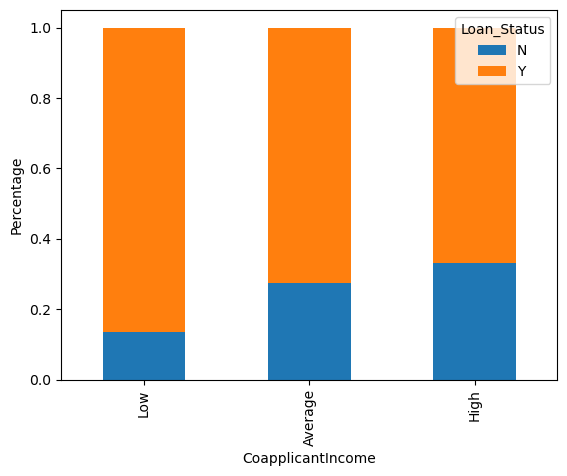

In [167]:
# Gelir binleri ve etiketleri belirleniyor
bins = [0, 1000, 3000, 42000]
group = ["Low", "Average", "High"]
train["Coapplicant_Income_bin"] = pd.cut(train["CoapplicantIncome"], bins, labels=group)

Coapplicant_Income_bin = pd.crosstab(train["Coapplicant_Income_bin"], train["Loan_Status"])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel("CoapplicantIncome")
P = plt.ylabel("Percentage")

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
Bazı analizlerde, <strong>coapplicant's income</strong> (<strong>ko-başvuru sahibi geliri</strong>) düşük olduğunda <strong>loan approval</strong> (<strong>kredi onayı</strong>) şansının yüksek olduğu gibi görünebilir. Ancak, bu durum yanıltıcı olabilir. Bunun temel nedeni, birçok başvuruda <strong>coapplicant</strong> (<strong>ko-başvuru sahibi</strong>) bulunmamasıdır. Bu durumda, <strong>coapplicant income</strong> (<strong>ko-başvuru sahibi geliri</strong>) değeri sıfır olarak kaydedilir ve bu sıfır değeri doğrudan kredi onayını etkilemez.

Daha doğru bir analiz yapabilmek için <strong>Applicant Income</strong> ve <strong>Coapplicant Income</strong> gelirlerini birleştirip <strong>total income</strong> (<strong>toplam gelir</strong>) olarak ele alabiliriz. Böylece, <strong>total income</strong> ile <strong>loan approval</strong> (<strong>kredi onayı</strong>) arasındaki ilişkiyi inceleyebilir ve gelir düzeyinin kredi onayı üzerindeki etkisini daha net görebiliriz. <strong>Total income</strong> kullanarak bu ilişkiyi görselleştirmek, daha açıklayıcı ve doğru sonuçlar sağlayacaktır.
</font>

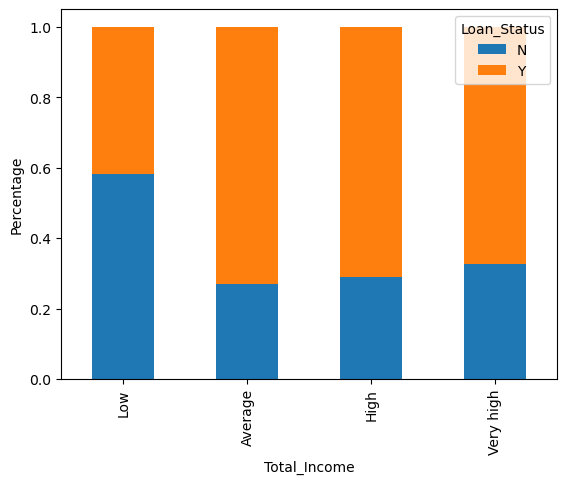

In [168]:
train["Total_Income"] = train["ApplicantIncome"] + train["CoapplicantIncome"]

# Gelir binleri ve etiketleri belirleniyor
bins = [0, 2500, 4000, 6000, 81000]
group = ["Low", "Average", "High", "Very high"]
train["Total_Income_bin"] = pd.cut(train["Total_Income"], bins, labels=group)

# Crosstab ile her gelir dilimindeki kredi durumunu analiz et
Total_Income_bin = pd.crosstab(train["Total_Income_bin"], train["Loan_Status"])

# Yüzde olarak normalize et
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel("Total_Income")
P = plt.ylabel("Percentage")

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
Toplam Geliri düşük olan başvuru sahiplerinin kredi onay oranlarının, <strong>Ortalama(Average)</strong>, <strong>Yüksek(High)</strong> ve <strong>Çok Yüksek Gelir(Very High)</strong> düzeyine sahip başvuru sahiplerine kıyasla oldukça düşük olduğunu görebiliriz.

Şimdi <strong>Loan Amount</strong> (<strong>Kredi Tutarı</strong>) değişkenini görselleştirelim.
</font>

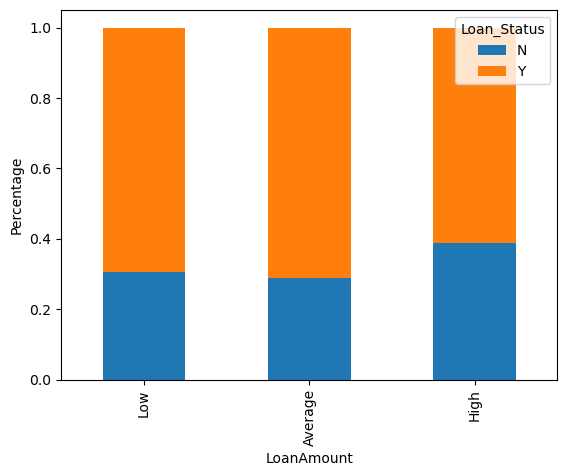

In [169]:
bins = [0, 100, 200, 700]
group = ["Low", "Average", "High"]
train["LoanAmount_bin"] = pd.cut(train["LoanAmount"], bins, labels=group)

LoanAmount_bin = pd.crosstab(train["LoanAmount_bin"], train["Loan_Status"])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel("LoanAmount")
P = plt.ylabel("Percentage")

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
Görülebilir ki, düşük ve <strong>ortalama Loan Amount</strong> (<strong>Kredi Tutarı</strong>) için onaylanan kredilerin oranı, yüksek kredi tutarına göre daha yüksektir. Bu da, kredi tutarı düşük olduğunda kredi onayı şansının artacağı yönündeki <strong>hipotezimizi</strong> desteklemektedir.
</font>

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
Şimdi, oluşturduğumuz <strong>bins</strong> (gelir aralıklarını) artık inceleme aşaması tamamlandığı için kaldırabiliriz. Ayrıca, <strong>Dependents</strong> (<strong>Bağımlı Kişiler</strong>) değişkenindeki <strong>"3+"</strong> değerini 3 olarak değiştireceğiz ve bunu sayısal bir değişkene dönüştüreceğiz.

<strong>Target Variable</strong> (<strong>Hedef Değişken</strong>) kategorilerini de 0 ve 1 olarak değiştireceğiz. Bunun amacı, sayısal değişkenlerle korelasyonunu bulmak ve <strong>logistic regression</strong> gibi yalnızca sayısal değerleri kabul eden modellerde kullanılabilir hale getirmektir.

Bu bağlamda, <strong>"N"</strong> değerlerini 0, <strong>"Y"</strong> değerlerini ise 1 ile değiştireceğiz.
</font>

In [170]:
# Sütunları kaldır
train = train.drop(["Income_bin", "Coapplicant_Income_bin", "LoanAmount_bin", "Total_Income_bin", "Total_Income"], axis=1, errors='ignore')

# 'Dependents' sütunundaki "3+" değerini 3 ile değiştir
train["Dependents"].replace("3+", 3, inplace=True)
test["Dependents"].replace("3+", 3, inplace=True)

# 'Loan_Status' sütunundaki "N" ve "Y" değerlerini sırasıyla 0 ve 1 ile değiştir
train["Loan_Status"].replace("N", 0, inplace=True)
train["Loan_Status"].replace("Y", 1, inplace=True)

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
Şimdi tüm sayısal değişkenler arasındaki <strong>korelasyonu</strong> inceleyelim. <strong>Heatmap</strong> (<strong>Isı Haritası</strong>) kullanarak korelasyonu görselleştireceğiz. Isı haritaları, veriyi renk değişimleriyle görselleştirir. Koyu renkler, iki değişken arasındaki korelasyonun daha güçlü olduğunu gösterir. Bu görselleştirme, hangi değişkenlerin birbiriyle daha güçlü ilişkiler içinde olduğunu hızlıca anlamamıza yardımcı olur.
</font>

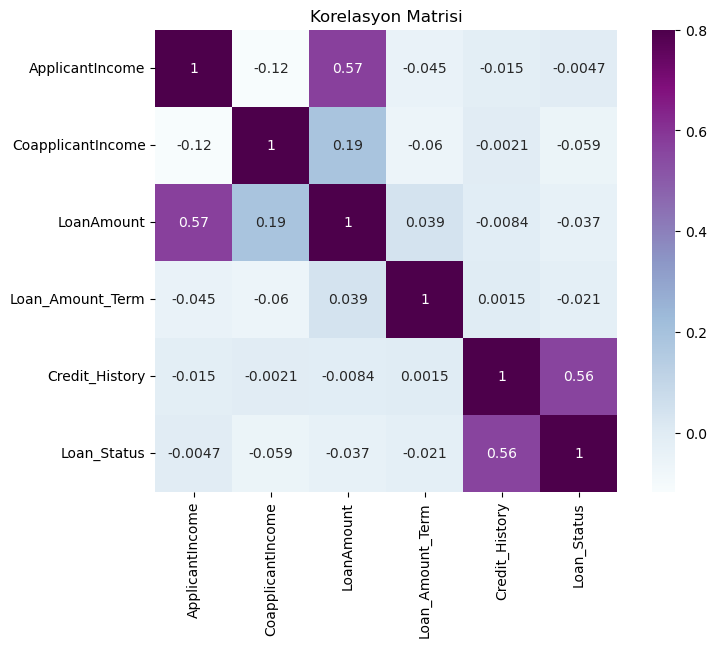

In [171]:
# Sayısal sütunları seç
numeric_train = train.select_dtypes(include=["float64", "int64"])

# Korelasyon matrisi oluştur
matrix = numeric_train.corr()

# Isı haritası görselleştirme
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=0.8, square=True, cmap="BuPu", annot=True)
plt.title("Korelasyon Matrisi")
plt.show()


<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
Görüyoruz ki, en yüksek korelasyona sahip değişkenler <strong>ApplicantIncome</strong> (<strong>Başvuru Sahibi Geliri</strong>) - <strong>LoanAmount</strong> (<strong>Kredi Miktarı</strong>) ve <strong>Credit_History</strong> (<strong>Kredi Geçmişi</strong>) - <strong>Loan_Status</strong> (<strong>Kredi Durumu</strong>). Ayrıca, <strong>LoanAmount</strong> (<strong>Kredi Miktarı</strong>) ile <strong>CoapplicantIncome</strong> (<strong>Ko-Başvuru Sahibi Geliri</strong>) arasında da bir korelasyon bulunuyor. Bu, bu değişkenlerin birbirleriyle güçlü bir ilişki içinde olduğunu gösteriyor.
</font>

In [172]:
#https://chatgpt.com/c/67475d0b-b20c-8000-81a8-91bd71fbd77d

<h2>Eksik Değer ve Aykırı Değer İşleme 🛑🚨</h2>

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
Verimizdeki tüm değişkenler (variables) incelendikten sonra, <strong>eksik değerler</strong> (missing values) için doldurma işlemi (imputation) yapılabilir ve <strong>aykırı değerler</strong> (outliers) işlenebilir. Çünkü eksik veriler (missing data) ve aykırı değerler (outliers), model performansı (model performance) üzerinde olumsuz etkiler (adverse effects) yaratabilir.
</font>

<h2>Eksik Değer Doldurma (Missing Value Imputation)</h2>

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
Özellik bazında eksik değerlerin sayısını listeleyelim:
</font>

In [173]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
Cinsiyet (Gender), Evli (Married), Bağımlılar (Dependents), Kendinden Çalışan (Self_Employed), Kredi Miktarı (LoanAmount), Kredi Süresi (Loan_Amount_Term) ve Kredi Geçmişi (Credit_History) özelliklerinde eksik değerler bulunmaktadır.
</font>

<h2>Eksik Değerlerin Doldurulması</h2>

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
<strong>Sayısal Değişkenler</strong>: Ortalama (mean) veya medyan (median) ile doldurulur.<br>
<strong>Kategorik Değişkenler</strong>: Mod (mode) ile doldurulur.<br><br>
<strong>Özellikler</strong>:<br>
Cinsiyet (Gender), Evli (Married), Bağımlılar (Dependents), Kredi Geçmişi (Credit_History) ve Kendinden Çalışan (Self_Employed) özelliklerindeki eksik değerler, mod (mode) ile doldurulabilir.
</font>

In [174]:
train["Gender"].fillna(train["Gender"].mode()[0], inplace = True)
train["Married"].fillna(train["Married"].mode()[0], inplace = True)
train["Dependents"].fillna(train["Dependents"].mode()[0], inplace = True)
train["Self_Employed"].fillna(train["Self_Employed"].mode()[0], inplace = True)
train["Credit_History"].fillna(train["Credit_History"].mode()[0], inplace = True)

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
<strong>Şimdi, Loan_Amount_Term (Kredi Süresi)</strong> özelliğindeki eksik değerleri doldurmanın bir yolunu bulmaya çalışalım. Bunun için, <strong>Loan_Amount_Term</strong> değişkeninin değer sayısını inceleyeceğiz.
</font>

In [175]:
train["Loan_Amount_Term"].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
<strong>Loan_Amount_Term (Kredi Süresi)</strong> değişkeninde, 360 değeri en çok tekrarlanan değerdir. Bu nedenle, bu değişkendeki eksik değerleri, değişkenin moduyla (en sık görülen değer) dolduracağız.
</font>

In [176]:
train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0], inplace = True)
test["Loan_Amount_Term"].fillna(test["Loan_Amount_Term"].mode()[0], inplace = True)

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
<strong>Şimdi, LoanAmount (Kredi Miktarı)</strong> değişkenine bakalım. Bu sayısal bir değişken olduğu için, eksik değerleri doldurmak için ortalama (mean) veya medyan (median) kullanılabilir. Ancak, daha önce kredi miktarında aykırı değerler (outliers) gördüğümüz için, ortalama bu aykırı değerlerden yüksek oranda etkilenir. Bu nedenle, eksik değerleri doldurmak için <strong>medyanı (median)</strong> kullanacağız.
</font>

In [177]:
train["LoanAmount"].fillna(train["LoanAmount"].median(), inplace = True)
test["LoanAmount"].fillna(test["LoanAmount"].median(), inplace = True)

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
Şimdi, verisetindeki tüm eksik değerlerin doldurulup doldurulmadığını kontrol edelim.
</font>

In [178]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
Görüldüğü gibi, test verisetindeki tüm eksik değerler doldurulmuş. Şimdi, aynı yaklaşımı kullanarak test verisetindeki tüm eksik değerleri de dolduralım.
</font>

In [179]:
test["Gender"].fillna(test["Gender"].mode()[0], inplace = True)
test["Married"].fillna(test["Married"].mode()[0], inplace = True)
test["Dependents"].fillna(test["Dependents"].mode()[0], inplace = True)
test["Self_Employed"].fillna(test["Self_Employed"].mode()[0], inplace = True)
test["Credit_History"].fillna(test["Credit_History"].mode()[0], inplace = True)

In [180]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

<h2>Aykırı Değer İşleme</h2>

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
<strong>LoanAmount (Kredi Miktarı)</strong> değişkeninde aykırı değerler bulunduğundan, bu aykırı değerleri işlememiz gerekmektedir. Aykırı değerlerin varlığı, verinin dağılımını etkiler ve analiz sonuçlarını bozabilir.<br><br>

<strong>Örnek Veri Kümesi:</strong><br>
1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4<br><br>

<strong>Bu veri kümesi için hesaplanan istatistikler:</strong><br>
Ortalama (Mean) = 2.58<br>
Medyan (Median) = 2.5<br>
Mod (Mode) = 2<br>
Standart Sapma (Standard Deviation) = 114.74<br><br>

<strong>Etkiler:</strong><br>
Aykırı değerlerin varlığı, özellikle ortalama ve standart sapma üzerinde önemli bir etki yaratır, bu da veri dağılımını bozar. Bu nedenle, <strong>LoanAmount</strong> verisindeki aykırı değerleri işlememiz gerekiyor.<br><br>

<strong>Aykırı Değerlerin Etkisi:</strong><br>
<strong>Sağ Çarpıklık (Right Skewness):</strong> Aykırı değerler, verinin büyük bir kısmının sol tarafta yoğunlaşmasına ve sağ kuyruğun uzun olmasına neden olur. Bu durumda, veri dağılımı normalden sapar.<br><br>

<strong>Çarpıklığı Gidermek İçin Yöntem:</strong><br>
<strong>Log Dönüşümü:</strong> Aykırı değerlerin etkisini azaltmak için log dönüşümü yapılabilir. Log dönüşümü, küçük değerleri fazla etkilemezken, büyük değerleri daha fazla küçültür ve normal dağılıma daha yakın bir dağılım elde edilmesini sağlar.
</font>

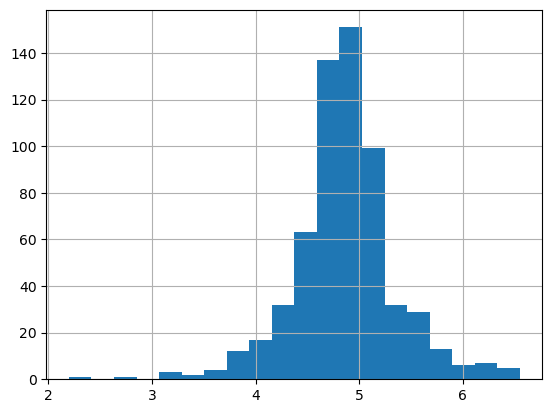

In [181]:
train["LoanAmount_log"] = np.log(train["LoanAmount"])
train["LoanAmount_log"].hist(bins=20)
test["LoanAmount_log"] = np.log(test["LoanAmount"])

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
<strong>Şimdi dağılım çok daha normal bir şekle yakın görünüyor ve uç değerlerin etkisi önemli ölçüde azalmış durumda.</strong> Şimdi, bir lojistik regresyon modeli kurarak test verisetine yönelik tahminler yapalım.
</font>

In [182]:
# https://chatgpt.com/c/6748b890-a0b0-8000-8014-8ae66a1845d1

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
<h2>İlk Lojistik Regresyon Modelimizi Kuruyoruz</h2>

Lojistik Regresyon, ikili sonuçları tahmin etmek için kullanılan güçlü bir algoritmadır. Bu modelin nasıl çalıştığını ve nasıl kullanabileceğimizi adım adım açıklayalım.

<h3>Lojistik Regresyon Nedir?</h3>

Lojistik Regresyon, sınıflandırma algoritmasıdır. İki olası sonucun tahmin edilmesi için kullanılır. Yani hedef değişken sadece iki değer alabilir:

- 1 / 0
- Evet / Hayır
- Doğru / Yanlış

Lojistik regresyon, bağımsız değişkenler (özellikler veya prediktörler) kullanarak, hedef değişkenin hangi sınıfa ait olma olasılığını tahmin eder.

<h3>Logit Fonksiyonu</h3>

Lojistik regresyonun temelinde Logit fonksiyonu bulunur. Logit fonksiyonu, bir olayın gerçekleşme olasılığının şans oranının logaritmasını alır.

**Şans (odds) oranı**, bir olayın gerçekleşme olasılığı ile gerçekleşmeme olasılığı arasındaki oranı ifade eder. Matematiksel olarak şöyle hesaplanır:

$$
\text{Logit} = \log \left( \frac{P(\text{olay})}{1 - P(\text{olay})} \right)
$$

Burada, $P(\text{olay})$ olayın gerçekleşme olasılığıdır. Bu işlem, bağımsız değişkenlerle hedef değişken arasındaki ilişkiyi modellememize yardımcı olur.

<h3>Sigmoid Fonksiyonu</h3>

Logit fonksiyonunun çıktısı, sigmoid fonksiyonu kullanılarak 0 ile 1 arasında bir olasılık değerine dönüştürülür. Sigmoid fonksiyonu, S şeklinde bir eğri oluşturur ve tahmin edilen olasılığı 0 ile 1 arasında verir. Sigmoid fonksiyonu şu şekilde tanımlanır:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Burada, $z$ Logit fonksiyonunun sonucudur. Bu dönüşüm, modelin çıktısını bir olasılığa dönüştürür ve her iki sınıf arasında bir geçiş sağlar.
</font>


> Lojistik regresyonun ürettiği eğri, adım fonksiyonuna benzer ancak daha pürüzsüz bir geçişe sahiptir. Bağımsız değişkenlerin değeri arttıkça, olasılık değeri kademeli olarak 1’e yaklaşır. Bu özellik, lojistik regresyonun veri üzerinde daha yumuşak ve sürekli bir geçiş yaparak tahmin yapmasını sağlar.


<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
Loan_ID değişkenini, kredi durumunu etkilemediği için kaldıracağız. Eğitim veri setinde yaptığımız değişiklikleri, test veri setine de aynı şekilde uygulayacağız.
</font>

In [183]:
train = train.drop("Loan_ID", axis=1)
test = test.drop("Loan_ID", axis=1)

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
<Strong>Sklearn</Strong>, <strong>hedef değişkenlerin</strong> ayrı bir veri setinde olmasını gerektirir. Bu yüzden, eğitim veri setimizden <strong>hedef değişkeni (target variable)</strong> kaldıracak ve onu ayrı bir veri setinde saklayacağız.
</font>

In [184]:
X = train.drop("Loan_Status", axis=1)
y = train.Loan_Status

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
Şimdi, <strong>kategorik değişkenler</strong> için <strong>dummy (sahte) değişkenleri</strong> oluşturacağız. Dummy değişkenleri, kategorik verileri 0 ve 1'den oluşan bir diziye dönüştürür, bu da onları daha kolay bir şekilde sayısal hale getirmemize ve karşılaştırmamıza yardımcı olur.

Dummy değişkenlerinin nasıl çalıştığını daha iyi anlayalım:

<ul>
  <li>Örneğin, <strong>"Cinsiyet"</strong> değişkenini düşünelim. Bu değişkenin iki sınıfı vardır: Erkek ve Kadın.</li>
  <li><strong>Lojistik regresyon</strong> yalnızca sayısal verilerle çalıştığı için, erkek ve kadını sayısal verilere dönüştürmemiz gerekir.</li>
  <li>Dummy değişkeni uygulandıktan sonra, <strong>"Cinsiyet"</strong> değişkeni iki yeni değişkene dönüşecektir: <strong>Gender_Male</strong> ve <strong>Gender_Female</strong>, her biri bir sınıfı temsil eder: Erkek ve Kadın.</li>
  <li><strong>Gender_Male</strong>, eğer cinsiyet Kadın ise 0, Erkek ise 1 değeri alacaktır.</li>
</ul>
</font>


In [185]:
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
Şimdi, modelimizi <strong>eğitim veri seti</strong> üzerinde eğitecek ve <strong>test veri seti</strong> için tahminler yapacağız. Ancak, bu tahminleri nasıl doğrulayabiliriz? Bunun bir yolu, eğitim veri setini ikiye ayırmaktır: <strong>train</strong> (eğitim) ve <strong>validation</strong> (doğrulama) veri setleri. Modelimizi <strong>train</strong> veri seti üzerinde eğitiriz ve ardından bu modeli <strong>validation</strong> veri seti üzerinde test ederek tahminlerde bulunuruz. Bu sayede, doğrulama seti için gerçek değerler elimizde olduğu için tahminlerimizin doğruluğunu kontrol edebiliriz. Ancak, test veri seti için bu mümkün değildir çünkü test veri setinin gerçek sonuçları elimizde bulunmaz.
</font>

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
<strong>Eğitim veri setimizi</strong> ayırmak için <strong>train_test_split</strong> fonksiyonunu <strong>sklearn</strong> kütüphanesinden kullanacağız. İlk olarak, <strong>train_test_split</strong> fonksiyonunu içeri aktaralım:
</font>

In [186]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.3)

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
Veri seti, <strong>eğitim (training)</strong> ve <strong>doğrulama (validation)</strong> olarak ikiye ayrılmış durumda. Şimdi, <strong>LogisticRegression</strong> ve <strong>accuracy_score</strong> fonksiyonlarını <strong>sklearn</strong> kütüphanesinden içeri aktaracağız. Ardından, lojistik regresyon modelini <strong>eğitim verisi</strong> üzerinde eğiteceğiz (<strong>fit</strong>).
</font>

In [187]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [188]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [189]:
LogisticRegression(C = 1.0, class_weight = None, dual=False, fit_intercept = True, intercept_scaling = 1, max_iter = 100, 
                  multi_class = "ovr", n_jobs= 1, penalty = "12", random_state = 1,
                   solver = "liblinear", tol = 0.001, verbose = 0, warm_start = False
                  )

LogisticRegression(multi_class='ovr', n_jobs=1, penalty='12', random_state=1,
                   solver='liblinear', tol=0.001)

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
Burada <strong>C</strong> parametresi, düzenleme (<strong>regularization</strong>) kuvvetinin tersini temsil eder. <strong>Düzenleme</strong>, parametre değerlerinin büyüklüğünü artırmaya bir ceza uygulayarak aşırı öğrenmeyi (<strong>overfitting</strong>) azaltmayı hedefler.<br>

- <strong>C'nin Küçük Değerleri:</strong> Daha güçlü bir düzenleme uygular. Bu, modelin daha az karmaşık hale gelmesini ve aşırı öğrenmenin önlenmesini sağlar.  
- <strong>C'nin Büyük Değerleri:</strong> Daha zayıf bir düzenleme uygular ve modelin veriye daha fazla uyum sağlamasına izin verir.

<strong>Düzenleme</strong>, modelin genelleme yeteneğini artırmak için önemlidir.
Şimdi, <strong>doğrulama (validation)</strong> seti için <strong>Loan_Status</strong> tahminlerini yapalım ve modelimizin <strong>doğruluğunu (accuracy)</strong> hesaplayalım:
</font>

In [190]:
pred_cv = model.predict(x_cv)

In [191]:
accuracy_score(y_cv, pred_cv)

0.8054054054054054

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
Tahminlerimiz neredeyse <strong>%80 doğruluk oranına</strong> sahip. Yani, <strong>kredi durumu</strong> ile ilgili doğru tahminlerin <strong>%80'ini</strong> başarıyla tespit ettik. Bu, modelimizin oldukça iyi bir performans sergilediğini gösteriyor.
</font>

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
Şimdi, <strong>test veri seti</strong> için tahminler yapalım. Modelimizi, <strong>test veri seti</strong> üzerinde kullanarak <strong>Loan_Status</strong> tahminlerini elde edelim:
</font>

In [192]:
pred_test = model.predict(test)

In [193]:
submission = pd.read_csv(r"C:\Users\Samira\Sumeyra\btk-akademi\Home-Loan-Eligibility-Predictor\dataset\sample_submission_49d68Cx.csv")

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
Son teslimat için sadece <strong>Loan_ID</strong> ve ilgili <strong>Loan_Status</strong>'a ihtiyacımız var. Bu sütunları, test veri setindeki <strong>Loan_ID</strong> ve yaptığımız tahminler olan <strong>pred_test</strong> ile dolduracağız:
</font>

In [194]:
submission["Loan_Status"] = pred_test
submission["Loan_ID"] = test_original["Loan_ID"]

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
Unutmayalım ki, tahminlerinizi <strong>Y</strong> ve <strong>N</strong> olarak almanız gerekiyor. Bu yüzden, <strong>1</strong> ve <strong>0</strong> değerlerini <strong>Y</strong> ve <strong>N</strong>'ye dönüştüreceğiz:
</font>

In [195]:
submission["Loan_Status"].replace(0, "N", inplace= True)
submission["Loan_Status"].replace(1, "Y", inplace= True)

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
Son olarak, teslimat dosyamızı <strong>.csv formatına</strong> dönüştüreceğiz ve doğruluk oranını görmek için <strong>liderlik tablosuna (leaderboard)</strong> göndereceğiz. Bu işlem, modelimizin <strong>test veri seti</strong> üzerindeki performansını değerlendirmemizi sağlayacak.
</font>

In [196]:
pd.DataFrame(submission, columns= ["Loan_ID", "Loan_Status"]).to_csv("Logistic-Regression.csv")